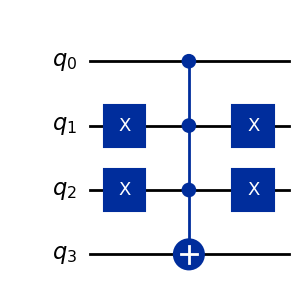

In [8]:
from qiskit.circuit.classicalfunction import classical_function
from qiskit.circuit.classicalfunction.types import Int1
 
@classical_function
def grover_oracle(a: Int1, b: Int1, c: Int1) -> Int1:
    return (a and not b and ( c ^ a))
 
quantum_circuit = grover_oracle.synth(registerless=True)
quantum_circuit.decompose().draw('mpl')

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import CCXGate  # Toffoli gate (controlled-controlled-X)

# Create quantum registers
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)

# Method 1: Direct implementation using Toffoli gate (CCX)
# This corresponds to the left side of the equation in your image
circuit.ccx(qreg[0], qreg[1], qreg[2])

# Method 2: Implementation with H and X gates as shown on the right side
# Create a new circuit for the alternative implementation
alt_circuit = QuantumCircuit(qreg, creg)

# Apply Hadamard gate to the target qubit
alt_circuit.h(qreg[2])

# Apply controlled operation (the middle part with the arrow)
# This is a controlled-Z gate with two controls
alt_circuit.cz(qreg[0], qreg[2])
alt_circuit.cz(qreg[1], qreg[2])

# Apply X gate to the target qubit
alt_circuit.h(qreg[2])

# Draw the circuits
print("Direct implementation:")
print(circuit.draw('mpl'))
print("\nAlternative implementation:")
print(alt_circuit.draw('mpl'))

Direct implementation:
          
q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
c: 3/═════
          

Alternative implementation:
                     
q_0: ──────■─────────
           │         
q_1: ──────┼──■──────
     ┌───┐ │  │ ┌───┐
q_2: ┤ H ├─■──■─┤ H ├
     └───┘      └───┘
c: 3/════════════════
                     
